# Autoencoder

**Author:** Qi Wu

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

### Read data

In [ ]:
data0_20.shape

(37893, 24)

In [ ]:
data0_20 = pd.read_csv('/content/final_merged HRY.csv', index_col='Unnamed: 0')
data0_20.columns

Index(['date', 'tic', 'month', 'close', 'volume', 'macd', 'boll_ub', 'boll_lb',
       'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma',
       'turbulence', 'vix', 'sentiment', 'ATR', 'Price_Change',
       'DBSCAN_Anomaly', 'OCSVM_Anomaly', 'IsolationForest_Anomaly',
       'Autoencoder_Anomaly', 'stat_anomaly', 'anomaly'],
      dtype='object')

In [ ]:
def conv_sentiment(x):
  try:
    return float(x)
  except:
    return 0
data0_20['sentiment'] = data0_20['sentiment'].apply(conv_sentiment)
tickers = data0_20['tic'].unique()

In [ ]:
def conv_sentiment(x):
  try:
    return float(x)
  except:
    return 0
data0_20['sentiment'] = data0_20['sentiment'].apply(conv_sentiment)
tickers = data0_20['tic'].unique()

data_ARL = data0_20[data0_20['tic']=='ARL'].copy()
data_ARL['return'] = data_ARL['close'].pct_change()
data_ARL = data_ARL.dropna().reset_index(drop=True)
data_ARL

,date,tic,month,Close,Volume,close,volume,macd,boll_ub,boll_lb,...,sentiment,ATR,Price_Change,DBSCAN_Anomaly,IsolationForest_Anomaly,OCSVM_Anomaly,Autoencoder_Anomaly,stat_Anomaly,LSTM_Anomaly,return
0,2015-10-21,ARL,2015-10,5.830000,4000,-0.766702,-0.166271,-0.265485,-0.742760,-0.772213,...,-0.057663,-1.248692,-0.053095,0,0,0,0,0,0,0.002121
1,2015-10-22,ARL,2015-10,5.740000,200,-0.768557,-0.172979,-0.255818,-0.747013,-0.771210,...,-0.073468,-1.250221,-0.059929,0,0,0,0,0,0,0.002419
2,2015-10-23,ARL,2015-10,5.680000,300,-0.768093,-0.174656,-0.244648,-0.752084,-0.769221,...,0.032118,-1.252956,0.008408,0,0,0,0,0,0,-0.000603
3,2015-10-26,ARL,2015-10,5.230000,3800,-0.768093,-0.175494,-0.233469,-0.758343,-0.765845,...,0.032118,-1.255935,-0.005259,0,0,0,0,0,0,0.000000
4,2015-10-27,ARL,2015-10,5.120000,3200,-0.772267,-0.173817,-0.231789,-0.764594,-0.762378,...,1.037911,-1.254753,-0.128266,0,0,0,0,0,0,0.005434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2024-08-23,ARL,2024-08,17.330000,3000,-0.508399,-0.099194,-0.102204,-0.478539,-0.498327,...,-0.073468,-0.955618,0.158750,0,0,0,0,0,0,-0.010827
2245,2024-08-26,ARL,2024-08,19.110001,13700,-0.482893,-0.157048,-0.061422,-0.478616,-0.498337,...,-0.073468,-0.955713,0.746443,0,0,0,0,1,0,-0.050169
2246,2024-08-27,ARL,2024-08,19.000000,2500,-0.474546,-0.155371,-0.010374,-0.477169,-0.497787,...,-0.073468,-0.958652,0.240753,0,0,0,0,0,0,-0.017286
2247,2024-08-28,ARL,2024-08,17.940001,12700,-0.485443,-0.156210,0.004891,-0.476763,-0.496292,...,-0.073468,-0.968180,-0.326441,0,0,0,0,0,0,0.022965


In [ ]:
data_ARL['sentiment'] = data_ARL['return'] - data_ARL['sentiment']*np.cov(data_ARL['return'],data_ARL['sentiment'])[0][1]/np.var(data_ARL['sentiment'])
data_ARL

,date,tic,month,Close,Volume,close,volume,macd,boll_ub,boll_lb,...,sentiment,ATR,Price_Change,DBSCAN_Anomaly,IsolationForest_Anomaly,OCSVM_Anomaly,Autoencoder_Anomaly,stat_Anomaly,LSTM_Anomaly,return
0,2015-10-21,ARL,2015-10,5.830000,4000,-0.766702,-0.166271,-0.265485,-0.742760,-0.772213,...,0.002099,-1.248692,-0.053095,0,0,0,0,0,0,0.002121
1,2015-10-22,ARL,2015-10,5.740000,200,-0.768557,-0.172979,-0.255818,-0.747013,-0.771210,...,0.002391,-1.250221,-0.059929,0,0,0,0,0,0,0.002419
2,2015-10-23,ARL,2015-10,5.680000,300,-0.768093,-0.174656,-0.244648,-0.752084,-0.769221,...,-0.000591,-1.252956,0.008408,0,0,0,0,0,0,-0.000603
3,2015-10-26,ARL,2015-10,5.230000,3800,-0.768093,-0.175494,-0.233469,-0.758343,-0.765845,...,0.000013,-1.255935,-0.005259,0,0,0,0,0,0,0.000000
4,2015-10-27,ARL,2015-10,5.120000,3200,-0.772267,-0.173817,-0.231789,-0.764594,-0.762378,...,0.005841,-1.254753,-0.128266,0,0,0,0,0,0,0.005434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2024-08-23,ARL,2024-08,17.330000,3000,-0.508399,-0.099194,-0.102204,-0.478539,-0.498327,...,-0.010856,-0.955618,0.158750,0,0,0,0,0,0,-0.010827
2245,2024-08-26,ARL,2024-08,19.110001,13700,-0.482893,-0.157048,-0.061422,-0.478616,-0.498337,...,-0.050198,-0.955713,0.746443,0,0,0,0,1,0,-0.050169
2246,2024-08-27,ARL,2024-08,19.000000,2500,-0.474546,-0.155371,-0.010374,-0.477169,-0.497787,...,-0.017315,-0.958652,0.240753,0,0,0,0,0,0,-0.017286
2247,2024-08-28,ARL,2024-08,17.940001,12700,-0.485443,-0.156210,0.004891,-0.476763,-0.496292,...,0.022936,-0.968180,-0.326441,0,0,0,0,0,0,0.022965


### Create sequences


In [ ]:
relevant_features = ['close', 'volume', 'Price_Change', 'return']

In [ ]:
TIME_STEPS = 288


# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(data_ARL_features.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (1962, 288, 16)


## Build model

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(288, 4)),
        layers.Conv1D(
            filters=32,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Conv1DTranspose(
            filters=16,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Conv1DTranspose(filters=4, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 144, 32)             │             928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 144, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 72, 16)              │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_2 (Conv1DTranspose) │ (None, 144, 16)             │           1,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 144, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_3 (Conv1DTranspose) │ (None, 288, 32)             │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_4 (Conv1DTranspose) │ (None, 288, 4)              │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

## Train model


In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - loss: 0.6597 - val_loss: 0.3279
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5131 - val_loss: 0.2022
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4091 - val_loss: 0.1274
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3534 - val_loss: 0.1019
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2965 - val_loss: 0.0899
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2710 - val_loss: 0.0826
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2362 - val_loss: 0.0776
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2099 - val_loss: 0.0709
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1816 - val_loss: 0.0684
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1625 - val_loss: 0.0659
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1520 - val_loss: 0.0629
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0

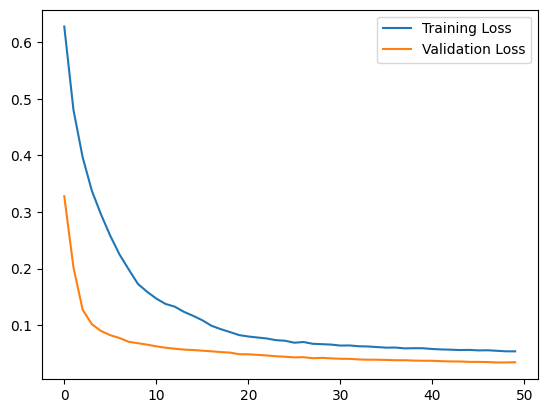

In [ ]:
# plot history train/validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

## Threshold for anomalies

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


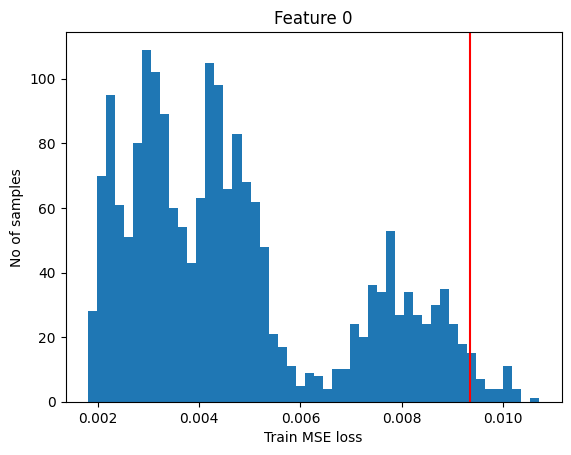

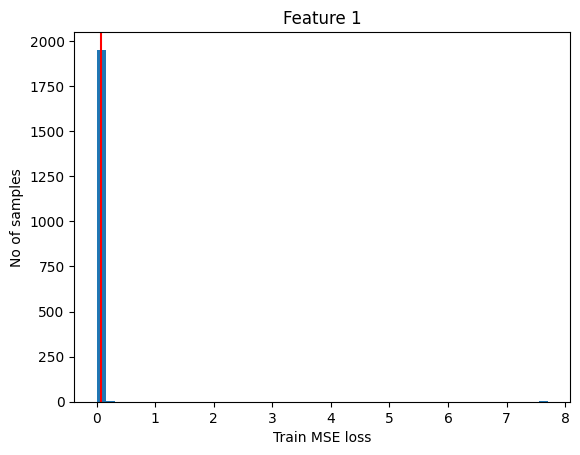

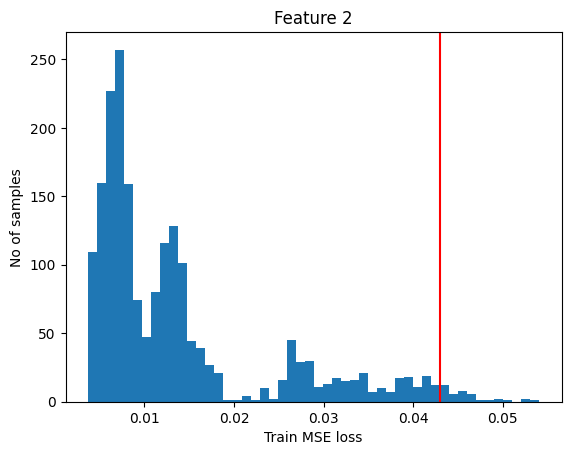

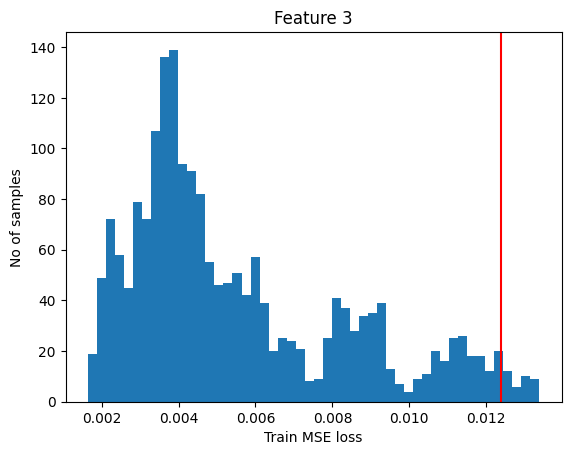

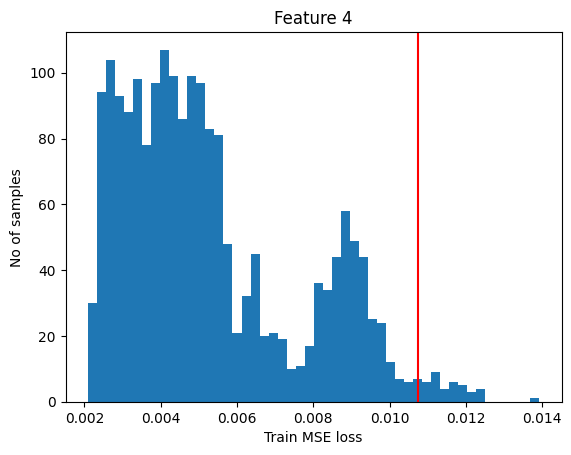

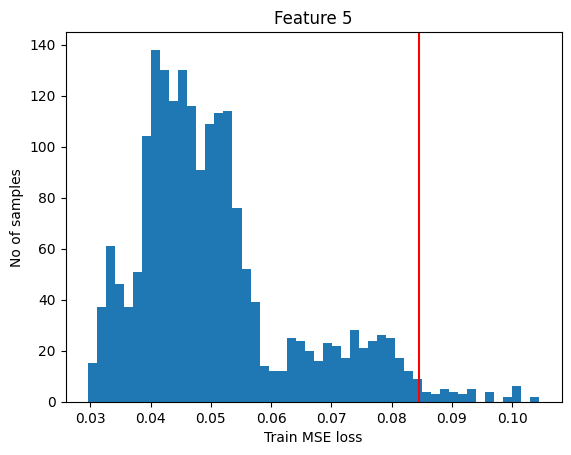

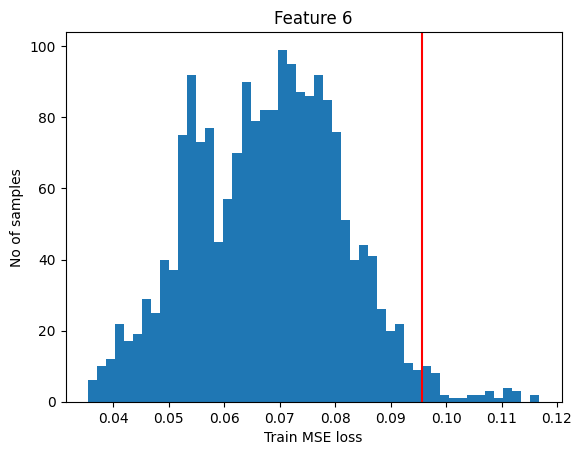

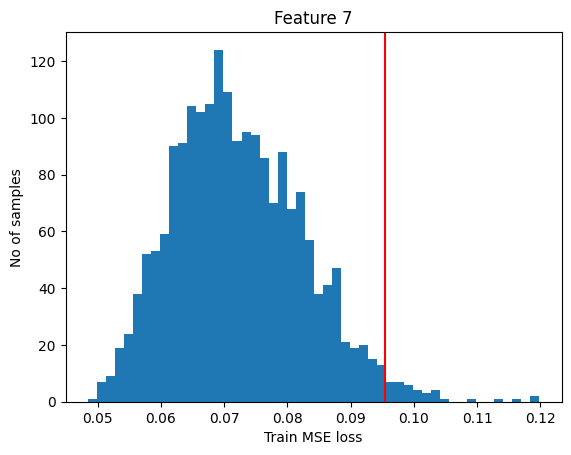

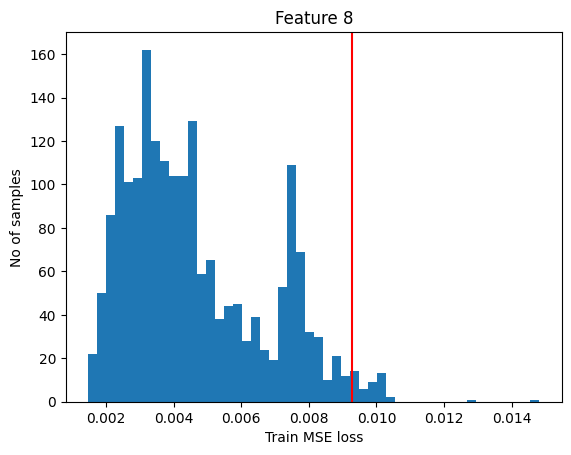

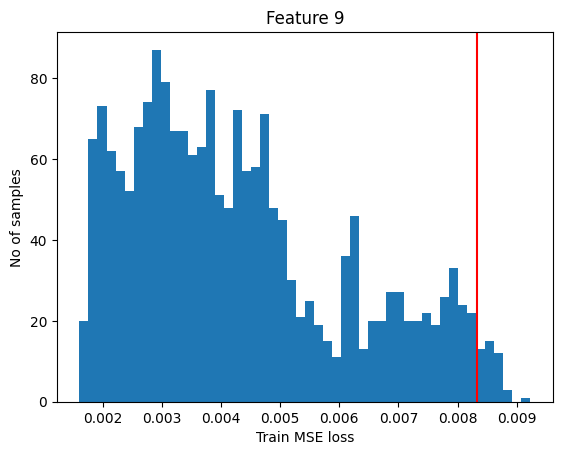

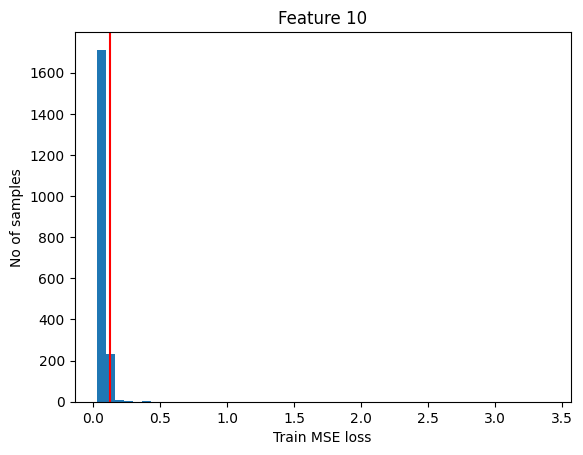

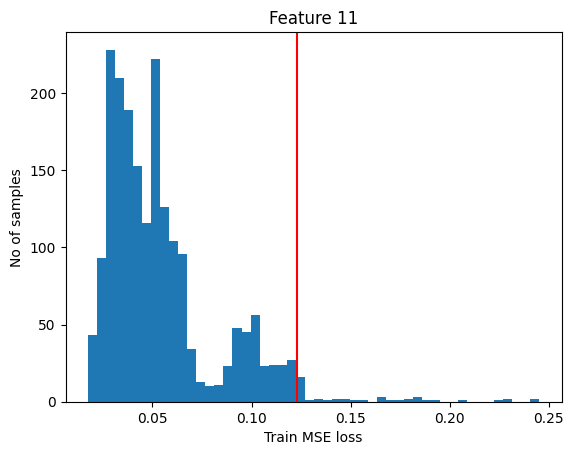

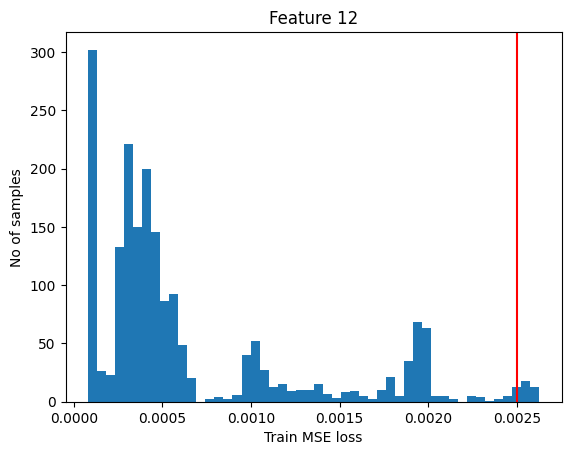

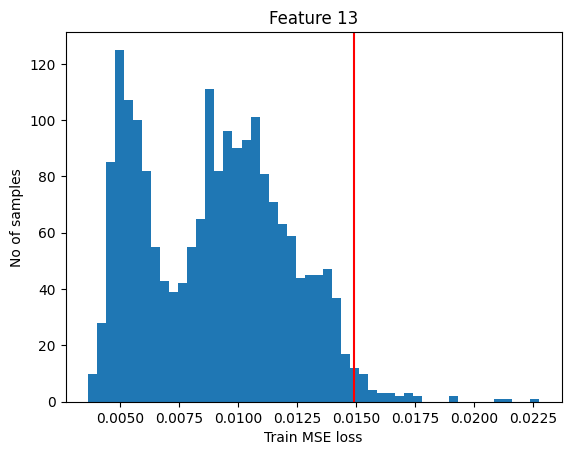

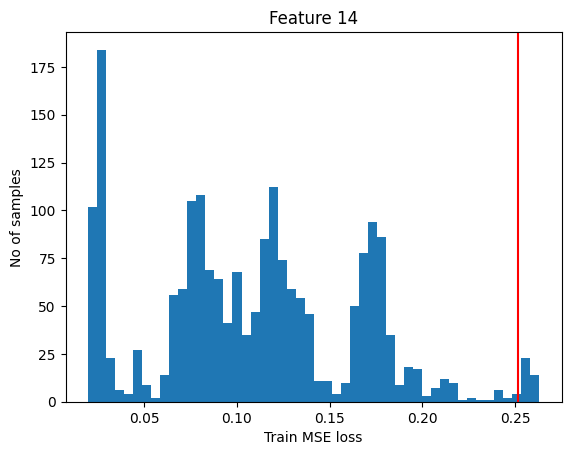

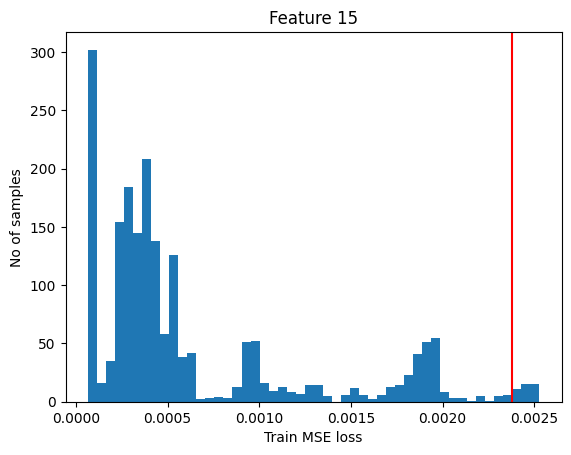

In [ ]:
q = 0.98

# Get train MSE loss.
x_train_pred = model.predict(x_train)
train_mse_loss = np.mean(np.power(x_train_pred - x_train, 2), axis=1)

# Get reconstruction loss threshold.
threshold = np.quantile(train_mse_loss,q,axis=0)
# print("Reconstruction error threshold: ", threshold)

for i in range(train_mse_loss.shape[1]):
  plt.hist(train_mse_loss[:, i], bins=50)
  plt.axvline(threshold[i], c='r')
  plt.xlabel("Train MSE loss")
  plt.ylabel("No of samples")
  plt.title(f'Feature {i}')
  plt.show()

# plt.hist(train_mse_loss, bins=50)
# plt.xlabel("Train MSE loss")
# plt.ylabel("No of samples")
# plt.show()



In [ ]:
train_mse_loss.shape

(1962, 16)

In [ ]:
x_train_pred.shape

(1962, 288, 16)

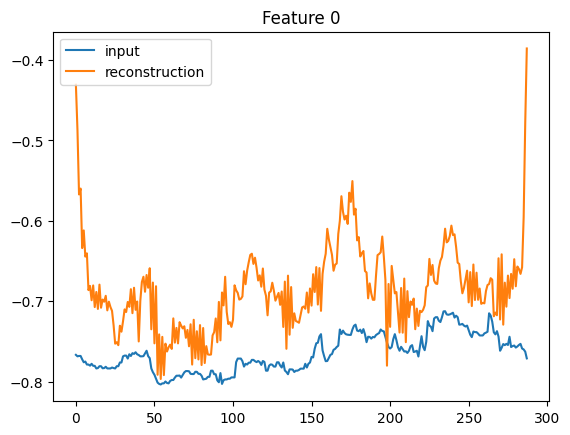

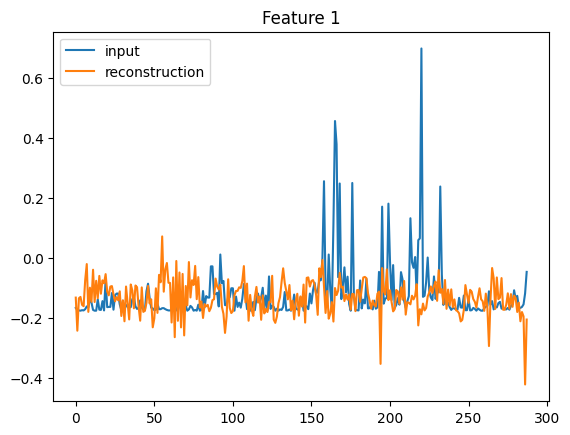

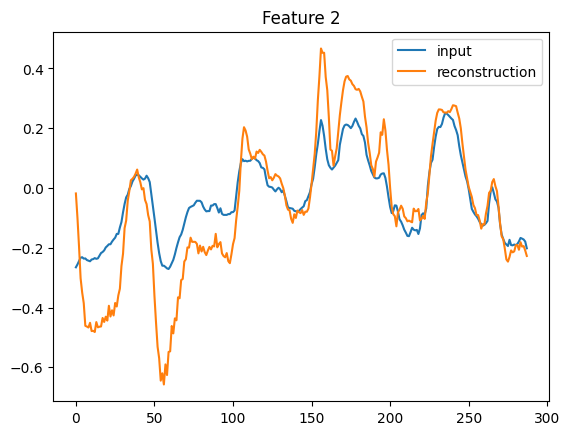

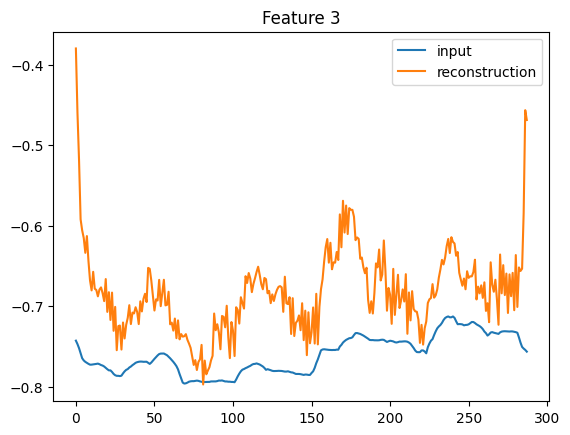

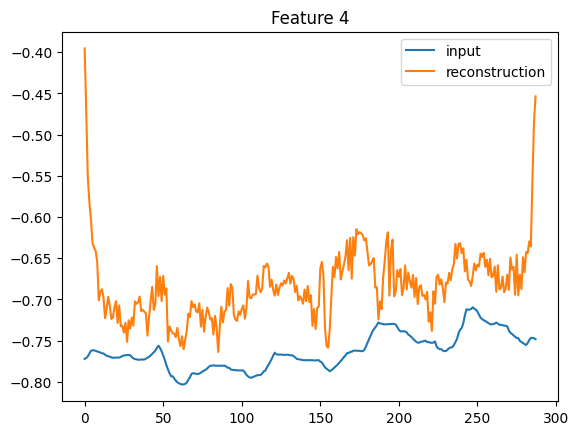

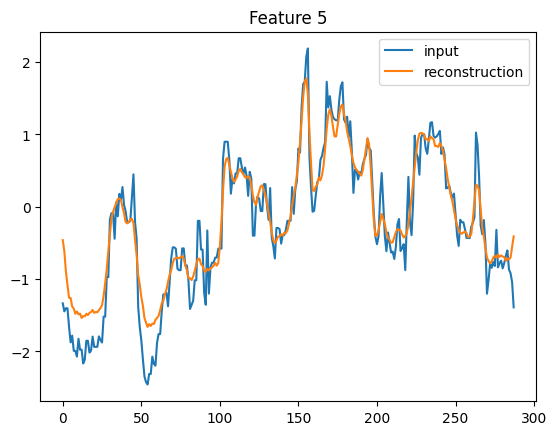

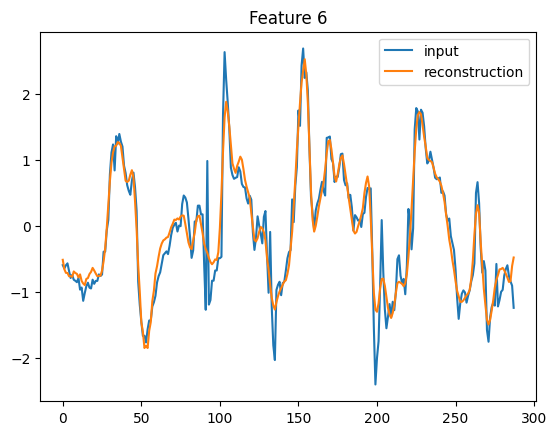

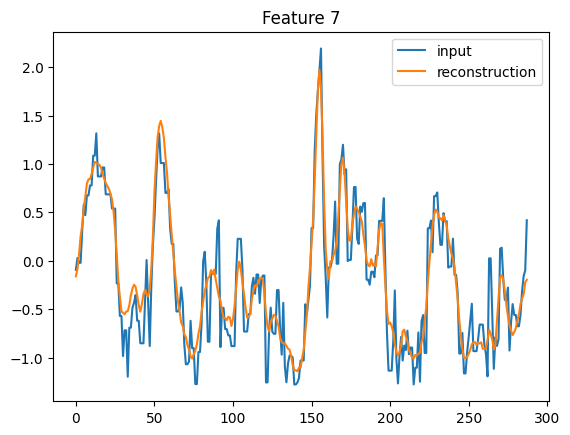

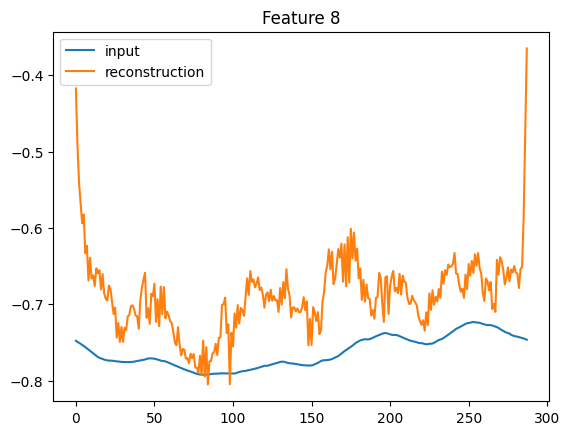

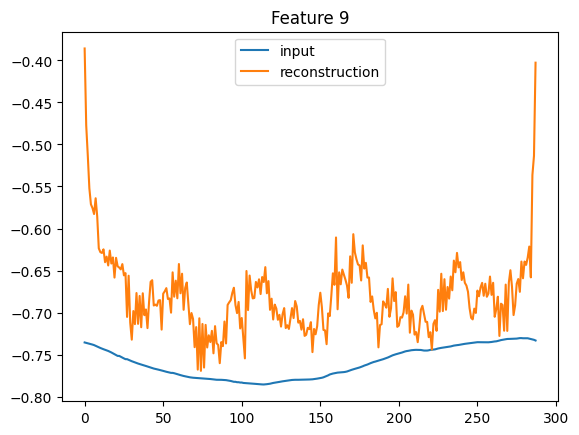

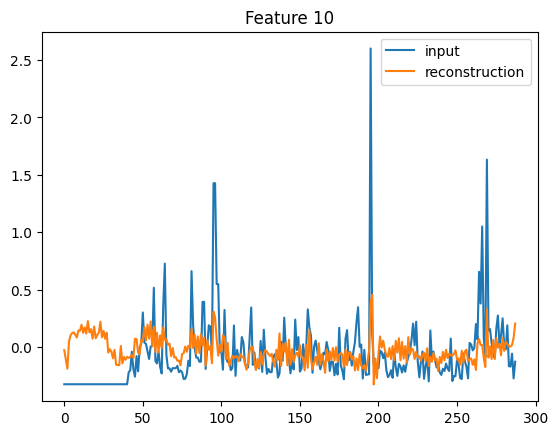

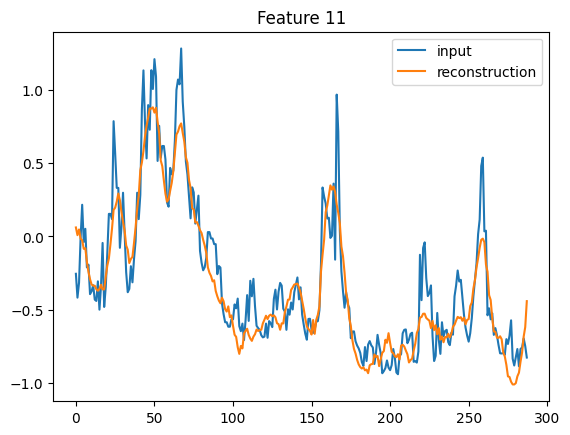

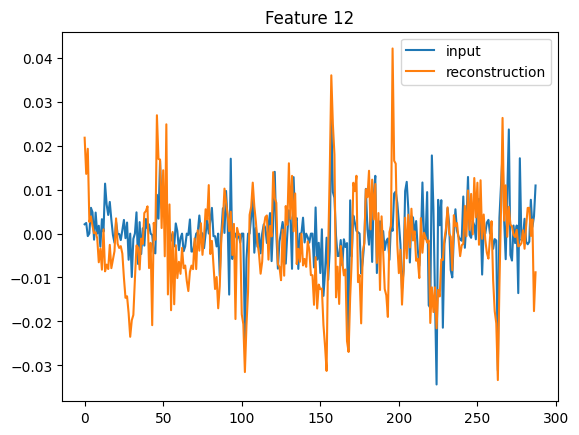

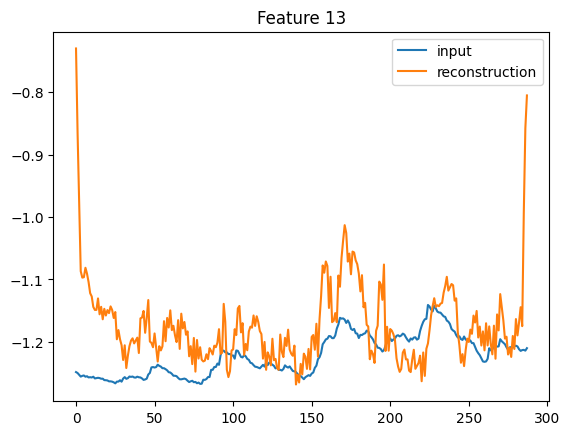

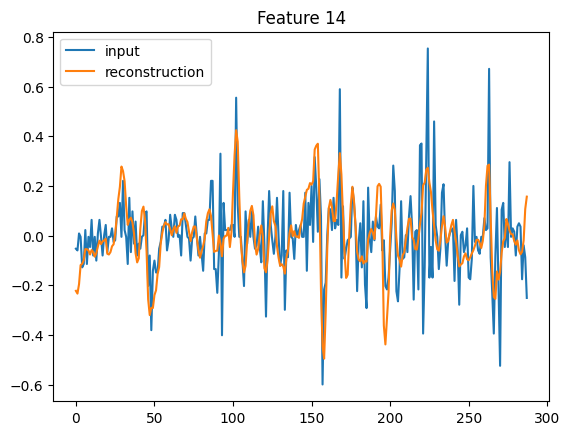

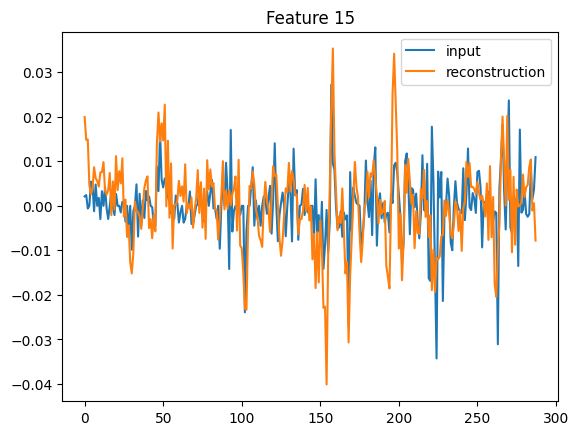

In [ ]:
# Checking how the first sequence is learnt
for i in range(x_train_pred.shape[2]):
  plt.plot(x_train[0, :, i])
  plt.plot(x_train_pred[0, :, i])
  plt.legend(['input','reconstruction'])
  plt.title(f'Feature {i}')
  plt.show()
# plt.plot(x_train[0,:,-1])
# plt.plot(x_train_pred[0, :, -1])
# plt.legend(['input','reconstruction'])
# plt.show()

In [ ]:
data_ARL.shape

(2249, 27)

In [ ]:
# Collapse the mse loss matrix

total_mse_loss = np.mean(np.power(x_train_pred - x_train, 2), axis=2) # over feature, shape[2]

def mse_loss_mean(array):
  m, n = array.shape
  mse_loss_mean = np.zeros(m+n-1)
  for i in range(m+n-1):
    sum = []
    for j in range(n):
      if i-j >= 0 and i-j < m:
        sum.append(array[i-j,j])
    mse_loss_mean[i] = np.mean(sum)
  return mse_loss_mean

total_mse_loss = mse_loss_mean(total_mse_loss) # over sequence, shape[1]
print(total_mse_loss.shape)

threshold = np.quantile(total_mse_loss,q)
print(f"Anomaly threshold {q}:", threshold)

anomalies = total_mse_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

(2249,)
Anomaly threshold 0.98: 0.1367404778154836
Number of anomaly samples:  45
Indices of anomaly samples:  (array([  92,  195,  269,  348,  504,  532,  571,  628,  642,  661,  667,
        720,  888,  975, 1096, 1099, 1100, 1101, 1104, 1105, 1106, 1107,
       1113, 1122, 1145, 1229, 1267, 1424, 1437, 1556, 1631, 1643, 1647,
       1654, 1655, 1662, 1675, 1700, 1858, 1866, 1881, 2007, 2057, 2215,
       2217]),)


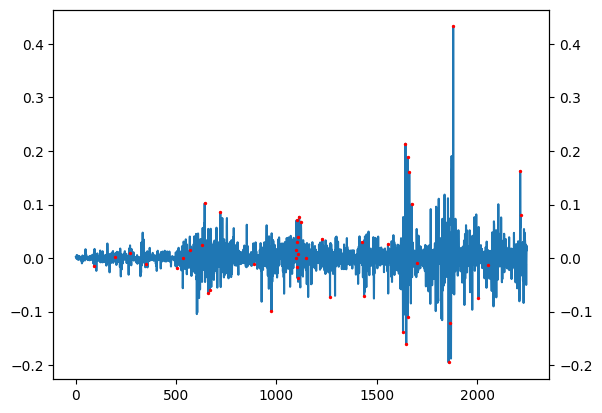

In [ ]:
# plot anomalies
ARL_anomaly = data_ARL.iloc[np.where(anomalies)]
fig, ax = plt.subplots()
ax.plot(data_ARL['return'])
ax2 = ax.twinx()
ax2.scatter(ARL_anomaly.index, ARL_anomaly['return'], color='r', s=2)
# df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

### Pipeline it

In [ ]:
def Autoencoder_pipeline(data, tic, features):
  data_tic = data0_20[data0_20['tic']==tic].copy()
  data_tic['return'] = data_tic['close'].pct_change()
  data_tic = data_tic.bfill().reset_index(drop=True)

  TIME_STEPS = 288
  # Generated training sequences for use in the model.
  def create_sequences(values, time_steps=TIME_STEPS):
      output = []
      for i in range(len(values) - time_steps + 1):
          output.append(values[i : (i + time_steps)])
      return np.stack(output)


  x_train = create_sequences(data_tic[features].values)
  print("Training input shape: ", x_train.shape)

  model = keras.Sequential(
      [
          layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
          layers.Conv1D(
              filters=32,
              kernel_size=7,
              padding="same",
              strides=2,
              activation="relu",
          ),
          layers.Dropout(rate=0.2),
          layers.Conv1D(
              filters=16,
              kernel_size=7,
              padding="same",
              strides=2,
              activation="relu",
          ),
          layers.Conv1DTranspose(
              filters=16,
              kernel_size=7,
              padding="same",
              strides=2,
              activation="relu",
          ),
          layers.Dropout(rate=0.2),
          layers.Conv1DTranspose(
              filters=32,
              kernel_size=7,
              padding="same",
              strides=2,
              activation="relu",
          ),
          layers.Conv1DTranspose(filters=x_train.shape[2], kernel_size=7, padding="same"),
      ]
  )
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
  history = model.fit(
      x_train,
      x_train,
      epochs=50,
      batch_size=128,
      validation_split=0.1,
      callbacks=[
          keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
      ],
  )

  x_train_pred = model.predict(x_train)
  total_mse_loss = np.mean(np.power(x_train_pred - x_train, 2), axis=2) # over feature, shape[2]

  def mse_loss_mean(array):
    m, n = array.shape
    mse_loss_mean = np.zeros(m+n-1)
    for i in range(m+n-1):
      sum = []
      for j in range(n):
        if i-j >= 0 and i-j < m:
          sum.append(array[i-j,j])
      mse_loss_mean[i] = np.mean(sum)
    return mse_loss_mean

  total_mse_loss = mse_loss_mean(total_mse_loss) # over sequence, shape[1]
  print("Loss shape: ", total_mse_loss.shape)

  data_tic['Autoencoder_loss'] = total_mse_loss
  data_tic.to_csv(f'/content/{tic}.csv')

  return total_mse_loss



In [ ]:
# tickers = data0_20['tic'].unique()
for tic in tickers:
  print('\n', tic)
  Autoencoder_pipeline(data0_20, tic, relevant_features)


 ARL
Training input shape:  (1942, 288, 4)
Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.7542 - val_loss: 0.0588
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.5804 - val_loss: 0.0511
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4653 - val_loss: 0.0547
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.3086 - val_loss: 0.0506
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1688 - val_loss: 0.0503
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.1189 - val_loss: 0.0502
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0931 - val_loss: 0.0497
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0931 - val_loss: 0.0497
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0858 - val_loss: 0.0494
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0787 - val_loss: 0.0493
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0826 - val_loss: 0.0487
Epoch 12/50
14/14 

In [ ]:
# concate datasets
dfs = []
for tic in tickers:
  df = pd.read_csv('/content/'+tic+'.csv', index_col='Unnamed: 0')
  dfs.append(df)
df_results = pd.concat(dfs)
df_results.to_csv('/content/df_results_AE.csv')
df_results

,date,tic,month,close,volume,macd,boll_ub,boll_lb,rsi_30,cci_30,...,ATR,Price_Change,DBSCAN_Anomaly,OCSVM_Anomaly,IsolationForest_Anomaly,Autoencoder_Anomaly,stat_anomaly,anomaly,return,Autoencoder_loss
0,2015-10-20,ARL,2015-10,-0.765079,-0.165433,-0.279741,-0.738759,-0.772951,-1.237234,-0.603321,...,-1.248227,0.028909,0,0,0,0,0,0.000000,0.002121,0.027536
1,2015-10-21,ARL,2015-10,-0.766702,-0.166271,-0.265485,-0.742760,-0.772213,-1.334864,-0.589971,...,-1.248692,-0.053095,0,0,0,0,0,0.000000,0.002121,0.019991
2,2015-10-22,ARL,2015-10,-0.768557,-0.172979,-0.255818,-0.747013,-0.771210,-1.445620,-0.640574,...,-1.250221,-0.059929,0,0,0,0,0,0.000000,0.002419,0.015914
3,2015-10-23,ARL,2015-10,-0.768093,-0.174656,-0.244648,-0.752084,-0.769221,-1.402981,-0.592321,...,-1.252956,0.008408,0,0,0,0,0,0.000000,-0.000603,0.013709
4,2015-10-26,ARL,2015-10,-0.768093,-0.175494,-0.233469,-0.758343,-0.765845,-1.402981,-0.563369,...,-1.255935,-0.005259,0,0,0,0,0,0.000000,0.000000,0.011441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2024-08-23,VALU,2024-08,0.091682,-0.017864,-0.116347,0.049155,0.133297,-0.142310,0.797156,...,-0.740305,-0.620291,0,0,0,0,0,0.106195,-0.185414,0.075037
2225,2024-08-26,VALU,2024-08,0.101420,-0.112610,-0.087748,0.050581,0.133945,-0.041770,0.685826,...,-0.760604,0.281753,0,0,0,0,0,0.093754,0.106221,0.053076
2226,2024-08-27,VALU,2024-08,0.134114,-0.054756,0.008761,0.058540,0.130607,0.283648,1.877188,...,-0.757963,0.958290,0,0,0,0,0,0.325143,0.322360,0.210358
2227,2024-08-28,VALU,2024-08,0.096319,0.050051,-0.001012,0.058701,0.130671,-0.112733,0.689328,...,-0.754414,-1.119148,0,0,0,0,0,0.842458,-0.281812,0.454023
